## Desafio EDA - `Trybe`

Realizar análise exploratória em uma base de dados pública

>Escolha dos dados
- A base escolhida foi da [PRF](https://portal.prf.gov.br/dados-abertos-infracoes) do ano de [2019](https://arquivos.prf.gov.br/arquivos/index.php/s/ITMD4E6KVH0FVha)

>Definição da linguagem e contexto
- A linguagem utilizada será Python
- A EDA está sendo feita para o desafio proposto pela `Trybe` para a vaga de `Data Analyst`

>Objetivos
- Analisar a base e tentar encontrar relações/causalidades.

>Perguntas a serem respondidas
- Qual é o objetivo da EDA?
    - Verificar o local em que mais ocorrem as infrações;
    - Identificar quais são as infrações mais recorrentes;
    - Qual BR tem mais registros de infrações;
    - Qual infração mais ocorre nos municípios
- Qual é o público alvo?
    - Concessionárias de rodovias e a própria PRF
- Quais hipóteses foram levantadas?
    - Que as infrações em "Transitar em velocidade superior à máxima permitida em até 20%" são as mais registradas e pode ser uma das causas de vários acidentes nas rodovias. (A PRF também os dados abertos de acidentes, porém não fiz a comparação para verificar se a hipótese seria confirmada)
    - A infração "Em movimento de dia, deixar de manter acesa luz baixa nas rodovias" talvez poderia ser evitada caso os veículos possuíssem acendimento automático dos faróis.
    - Os maiores estados com infrações foram RJ, SP, MG e BA provavelmente pela BR-116 fazer a ligação de ambos os estados.
    - Já AC, AP, RR e AM chegando a somente 0.78% das infrações segue o contrário da informação anterior, pois pode conter a menor movimentação rodoviária por questão comercial.
- Quais são os dados de entrada: Quantidade, fonte, formato?
    - O dados são da [PRF](https://portal.prf.gov.br/dados-abertos-infracoes) dos dados abertos de infrações do ano de [2019](https://arquivos.prf.gov.br/arquivos/index.php/s/ITMD4E6KVH0FVha). O arquivo é comprimido e nele contém um arquivo csv para cada mês do ano.
- Qual a linguagem escolhida?
    - A linguagem para realizar a EDA foi Python por já ter maior familiaridade, ter realizado cursos na Udemy. Foi a linguagem abordada na Pós-Graduação e também escolhida para o curso de Cientista de Dados pela Codenation.
- Quais *insights* foram extraidos? O que será apresentado para o público alvo?
    - Que a BR-116 é a que mais teve registros de infrações;
    - Os estados do RJ, SP, MG e BA juntas registraram 45.34% das infrações dos estados;
    - A média de registros de infrações/mês são de 478.509,17. Esse valor é elevado por conta dos 4 estados RJ, SP, MG e BA. Se pegarmos a média de infrações por estado, fica muito abaixo com valor de 212.670,74. Já os estados com menores registros foram AC, AP, RR e AM chegando a somente 0.78% das infrações.
    - A probabilidade de um dia ter um valor menor ou igual de 160.000 registros de infrações é de 8.46%, porém no caso de ter um valor maior que a média - 185.229,35 - é de 50.00%
    - Não devemos rejeitar a informação sobre a média uma vez que fazendo o teste de hipótese com α=0,05 o valor do p-value é de 0.1582. Testei com o valor de 190 mil infrações e está dentro da regição de aceitação.

In [1]:
# Importando as bibliotecas 

import zipfile
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sct

sns.set(style='dark')
pd.set_option('display.max_columns', 30)

from IPython.core.pylabtools import figsize
figsize(12,5)

import warnings
warnings.filterwarnings(action='ignore')

Fiz o download do arquivo manualmente pelo site https://arquivos.prf.gov.br/arquivos/index.php/s/ITMD4E6KVH0FVha

In [6]:
# Descompactando os arquivos em uma pasta

arq_zip = zipfile.ZipFile('arquivo2019.zip')
arq_zip.extractall('arquivo2019')
arq_zip.close()

In [7]:
# Juntando os arquivos em um único para realizar a análise

arquivos = glob.glob('arquivo2019\*.csv')
lista = []

for i in arquivos:
    df = pd.read_csv(i, sep=';', low_memory=False)
    lista.append(df)
    
dados = pd.concat(lista, axis=0)

>Legenda do arquivo:
>- Indicador de abordagem
    - C: Houve abordagem do veículo
    - S: Não houve abordagem do veículo
>- Sentido Tráfego
    - C: Crescente
    - D: Decrescente
>- Enquadramento da infração
    - De acordo com a lei do Código de Trânsito Brasileiro (CTB)
>- Medição infração
    - Registro da medição realizada em radares, etilômetros, balanças e trenas.
>- Medição Considerada
    - Medição considerada para o registro da infração
>- Excesso Verificado
    - Excesso verificado nas infrações onde são utilizados equipamentos de medição.
    
>- *obs.: Como a base é da PRF as infrações contidas nos dados são apenas das rodovias federais**

*[rodovias federais](https://estradas.com.br/entenda-como-funciona-a-definicao-de-porque-uma-rodovia-e-br-101-ou-br-290/)

In [34]:
print(f'A base contém {dados.shape[0]} linhas e {dados.shape[1]} colunas')

A base contém 5742110 linhas e 22 colunas


In [35]:
dados.head(3)

,Número do Auto,Data da Infração (DD/MM/AAAA),Indicador de Abordagem,Assinatura do Auto,Indicador Veiculo Estrangeiro,Sentido Trafego,UF Placa,UF Infração,BR Infração,Km Infração,Município,Código da Infração,Descrição Abreviada Infração,Enquadramento da Infração,Início Vigência da Infração,Fim Vigência Infração,Medição Infração,Descrição Especie Veículo,Descrição Marca Veículo,Hora Infração,Medição Considerada,Excesso Verificado
0,5bcd39ea93ac463,2019-01-06,C,N,S,C,-1,PR,369,132,IBIPORA,51930,Transportar criança sem observância das normas...,168,2016-11-01,NaN,Nenhuma,PASSAGEIRO,FORD,18,0.00,0.00
1,e038e26abee1b3f,2019-01-20,C,N,N,D,-1,RJ,356,169,SAO JOAO DA BARRA,67000,Conduzir veíc com vidro total/parcialmente cob...,230 XVI,2016-11-01,NaN,Nenhuma,PASSAGEIRO,OUTRA,16,0.00,0.00
2,e4881fa47a05ae9,2019-01-20,C,N,N,D,-1,RJ,356,169,SAO JOAO DA BARRA,66102,Conduzir o veículo com característica alterada,230 VII,2016-11-01,NaN,Nenhuma,PASSAGEIRO,OUTRA,16,0.00,0.00


In [36]:
dados.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5742110 entries, 0 to 492723
Data columns (total 22 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   Número do Auto                 5742110 non-null  object
 1   Data da Infração (DD/MM/AAAA)  5742110 non-null  object
 2   Indicador de Abordagem         5742110 non-null  object
 3   Assinatura do Auto             5742110 non-null  object
 4   Indicador Veiculo Estrangeiro  5742110 non-null  object
 5   Sentido Trafego                5742110 non-null  object
 6   UF Placa                       5742110 non-null  object
 7   UF Infração                    5742110 non-null  object
 8   BR Infração                    5742110 non-null  int64 
 9   Km Infração                    5742110 non-null  int64 
 10  Município                      5742110 non-null  object
 11  Código da Infração             5742110 non-null  int64 
 12  Descrição Abreviada Infração 

Com as duas informações anteriores observamos que há uma inconsistência:
- Colunas de datas e numéricas que estão como 'object'.
- Em algumas colunas há valores que seriam nulos e já estão como -1, então não precisarei alterar

### Convertendo o tipo das colunas

In [37]:
data = ['Data da Infração (DD/MM/AAAA)', 'Início Vigência da Infração', 'Fim Vigência Infração']
hora = ['Hora Infração']
decimal = ['Medição Considerada', 'Excesso Verificado']

# Transformei esses dados que estavam como inteiros em categoria pois não irei realizar contagem com esses valores.
categoria = ['BR Infração', 'Km Infração', 'Código da Infração']

In [38]:
def converterValores(df):
    # Converter campos de data
    for _, j in enumerate(data):
        df[j] = pd.to_datetime(df[j])
             
    # Converter campos de hora
    for _, j in enumerate(hora):
        df[j] = pd.to_timedelta(df[j], unit='h')
        
    # Converter campos numéricos para categoricos
    for _, j in enumerate(categoria):
        df[j] = df[j].astype('category')
        
    # Remove a vírgula dos campos
    for _, j in enumerate(decimal):
        df[j] = df[j].str.replace(',','')
        
    # Converter campos para float
    for _, j in enumerate(decimal):
        df[j] = df[j].astype('float')

In [39]:
# Convertendo os valores

converterValores(dados)

In [82]:
# Função para gerar o gráfico de barras

def graficoBarra(x, y, title=None, legX=None, legY=None, media=False):
    sns.barplot(x=x, y=y, palette='ocean');
    if media != False:
        sns.lineplot(x=x, y=y.mean(), color="salmon") # Linha da média
    plt.title(title, fontsize=18);
    plt.xlabel(legX, fontsize=13);

In [185]:
def salvarImagem(nome, formato):
    plt.savefig(nome + '.' + formato, format=formato, bbox_inches='tight')

In [41]:
dias = dados.groupby(dados['Data da Infração (DD/MM/AAAA)'].dt.day)['Número do Auto'].count()

*Obs.: A linha representa a média*

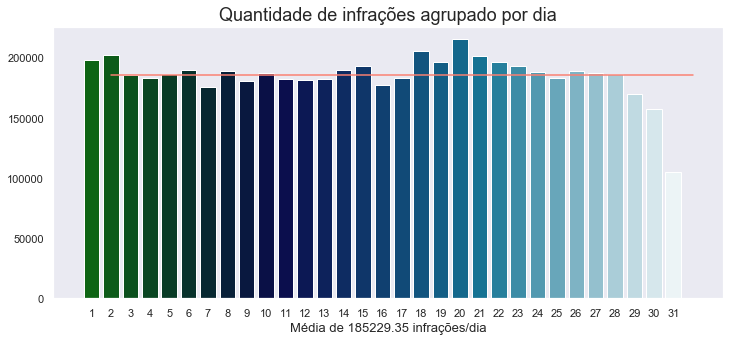

In [187]:
graficoBarra(x=dias.index, y=dias.values, title='Quantidade de infrações agrupado por dia', 
             legX=f'Média de {round(dias.mean(), 2)} infrações/dia', media=True)
salvarImagem('infra_dia', 'png')

Visualizando o histograma das infrações por dias

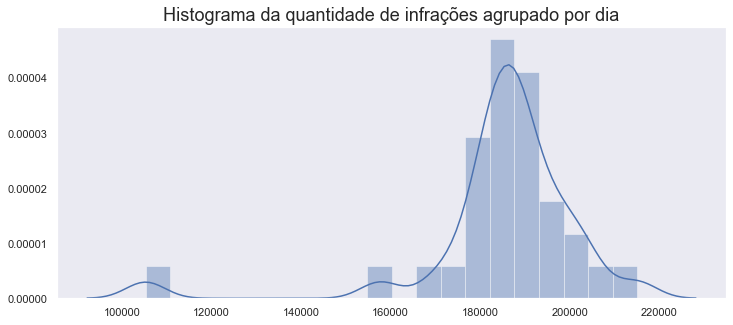

In [188]:
sns.distplot(dias, bins=20);
plt.title('Histograma da quantidade de infrações agrupado por dia', fontsize=18)
plt.xlabel('')
salvarImagem('infra_dia_prob', 'png')

In [121]:
dias_prob = sct.norm.cdf(160000, dias.mean(), dias.std())
dias_prob1 = sct.norm.cdf(170000, dias.mean(), dias.std())
print(f'A probabilidade de um dia ter um valor menor ou igual de 160.000 registros de infrações é de {dias_prob*100:.2f}%')
print(f'Agora, caso quisermos a probabilidade das infrações menor ou igual a 170.000 registros repare que já dá um salto para {dias_prob1*100:.2f}%')

A probabilidade de um dia ter um valor menor ou igual de 160.000 registros de infrações é de 8.46%
Agora, caso quisermos a probabilidade das infrações menor ou igual a 170.000 registros repare que já dá um salto para 20.33%


In [45]:
dias_prob_media = sct.norm.sf(dias.mean(), dias.mean(), dias.std())
print(f'A probabilidade de um dia ter mais de {dias.mean():.2f} registros (média) é de {dias_prob_media*100:.2f}%')

A probabilidade de um dia ter mais de 185229.35 registros (média) é de 50.00%


In [119]:
p_value_dias = sct.ttest_1samp(dias, popmean=190000)
p_value_dias[1]

0.15818989368952693

Fazendo o teste de hipótese com $\alpha$=0,05 não devemos rejeitar a informação. O teste foi feito com o valor de 190 mil infrações e o p-value ficou em 0,1582, dentro da região de aceitação

In [47]:
meses = dados.groupby(dados['Data da Infração (DD/MM/AAAA)'].dt.month)['Número do Auto'].count()

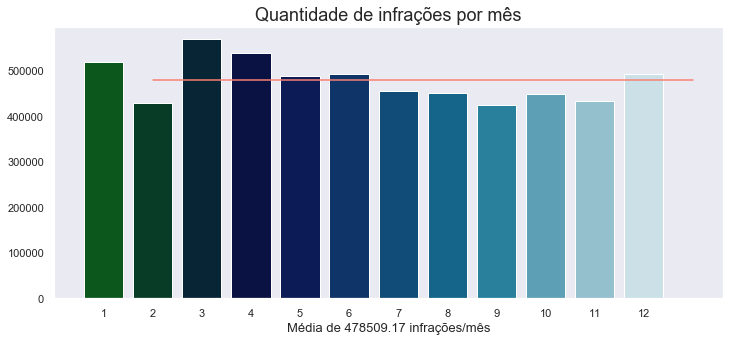

In [190]:
graficoBarra(x=meses.index, y=meses.values, title='Quantidade de infrações por mês', 
             legX=f'Média de {round(meses.mean(), 2)} infrações/mês', media=True)
salvarImagem('infra_mes', 'png')

In [49]:
uf_infracoes = dados.groupby('UF Infração')['Número do Auto'].count()

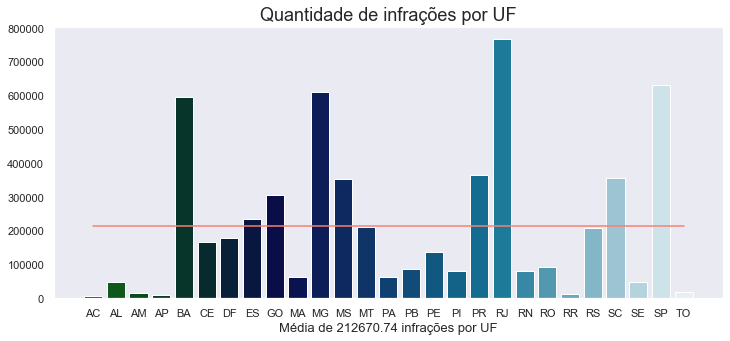

In [197]:
graficoBarra(x=uf_infracoes.index, y=uf_infracoes.values, title='Quantidade de infrações por UF', 
             legX=f'Média de {round(uf_infracoes.mean(), 2)} infrações por UF', media=True)
salvarImagem('infra_uf', 'png')

In [122]:
uf_infracoes_media_maior = uf_infracoes.sort_values(ascending=False)[:4].sum() / uf_infracoes.sum() * 100
uf_infracoes_media_menor = uf_infracoes.sort_values()[:4].sum() / uf_infracoes.sum() * 100

print(f'RJ, SP, MG e BA juntos registram {round(uf_infracoes_media_maior, 2)}% das infrações dos estados.\n\nAC, AP, RR e AM sãos os 4 estados com menores registros chegando a somente {round(uf_infracoes_media_menor, 2)}% das infrações.')

RJ, SP, MG e BA juntos registram 45.34% das infrações dos estados.

AC, AP, RR e AM sãos os 4 estados com menores registros chegando a somente 0.78% das infrações.


<br>

Com média de 478.509,17 multas/mês, conseguimos observar que esse valor é elevado por conta dos 4 estados RJ, SP, MG e BA. Agora, se pegarmos a média de infrações por estado, fica muito abaixo com valor de 212.670,74. 

Esse é o problema da média que sofre grande alteração por conta dos *outliers*

<br>

Observando as 15 BR's com maiores registros de infrações temos a [BR-116](https://pt.wikipedia.org/wiki/BR-116) campeã com 1.275.505 registros. Um fator importante para isso é por ela passa por dez estados, ligando cidades importantes como Porto Alegre, Curitiba, São Paulo, Rio de Janeiro e Fortaleza.

In [52]:
qtd_br_infracao = dados['BR Infração'].value_counts()[:15]
qtd_br_infracao

116    1275505
101     938235
40      511667
163     396774
324     278532
153     233716
364     150862
381     116639
277     114603
50      106924
60      106429
316     105747
376      86156
262      78279
70       72468
Name: BR Infração, dtype: int64

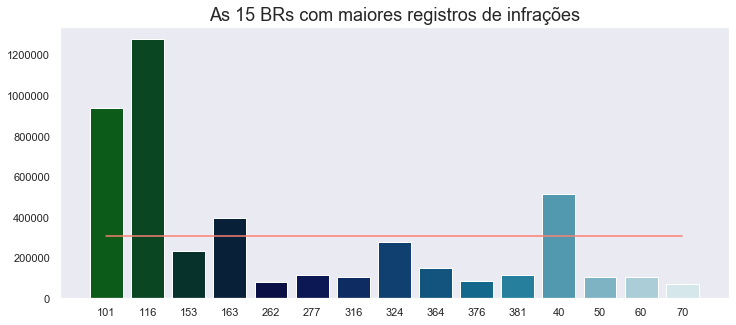

In [191]:
graficoBarra(x=['116','101','40','163','324','153','364','381','277','50','60','316','376','262','70'], 
             y=qtd_br_infracao.values, title='As 15 BRs com maiores registros de infrações', media=True)
salvarImagem('registros_br', 'png')

In [64]:
descricao_infracao = dados['Descrição Abreviada Infração'].value_counts()[:20]

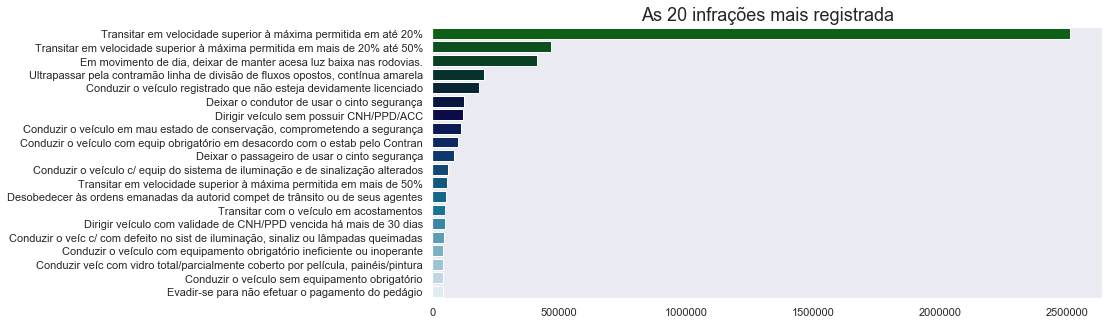

In [192]:
graficoBarra(x=descricao_infracao.values, y=descricao_infracao.index, 
             title='As 20 infrações mais registrada')
salvarImagem('infra_frequentes', 'png')

In [127]:
infra_cnh = dados.loc[dados['Descrição Abreviada Infração'] == 'Dirigir veículo sem possuir CNH/PPD/ACC']
infra_cnh = infra_cnh.groupby('Descrição Especie Veículo')['Número do Auto'].count().sort_values(ascending=False)

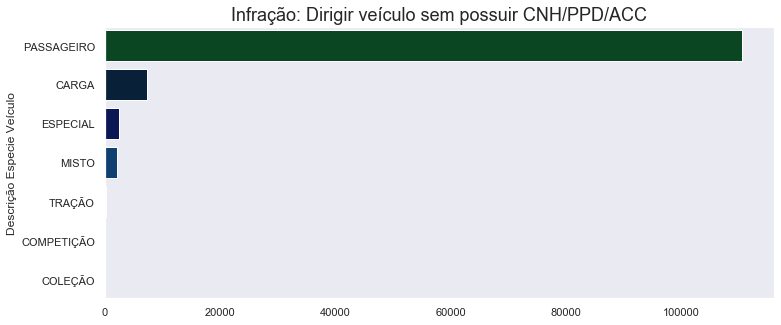

In [193]:
graficoBarra(x=infra_cnh.values, y=infra_cnh.index,
            title='Infração: Dirigir veículo sem possuir CNH/PPD/ACC')

In [132]:
infra_farol = dados.loc[dados['Descrição Abreviada Infração'] == 'Em movimento de dia, deixar de manter acesa luz baixa nas rodovias.']
infra_farol = infra_farol.groupby('Descrição Especie Veículo')['Número do Auto'].count().sort_values(ascending=False)

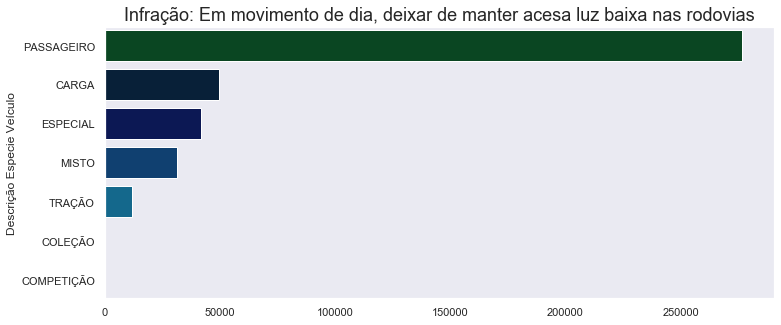

In [194]:
graficoBarra(x=infra_farol.values, y=infra_farol.index,
            title='Infração: Em movimento de dia, deixar de manter acesa luz baixa nas rodovias')

In [134]:
municipios = dados['Município'].value_counts()[:10]

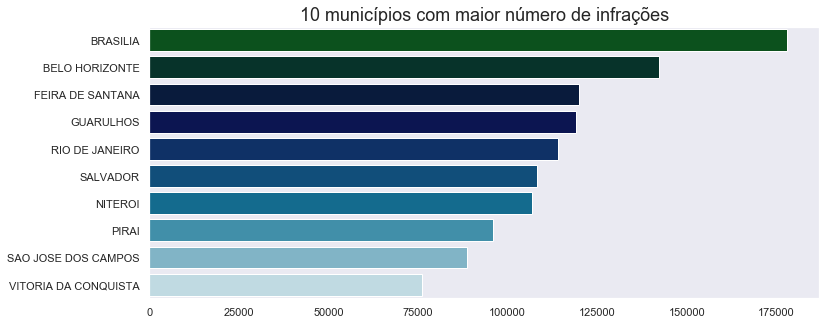

In [195]:
graficoBarra(x=municipios.values, y=municipios.index,
            title='10 municípios com maior número de infrações')

In [148]:
municipio_infra_desc = dados.loc[dados['Município'] == 'BRASILIA']
municipio_infra_desc = municipio_infra_desc.groupby(['Descrição Abreviada Infração'])['Município'].count().sort_values(ascending=False)[:20]

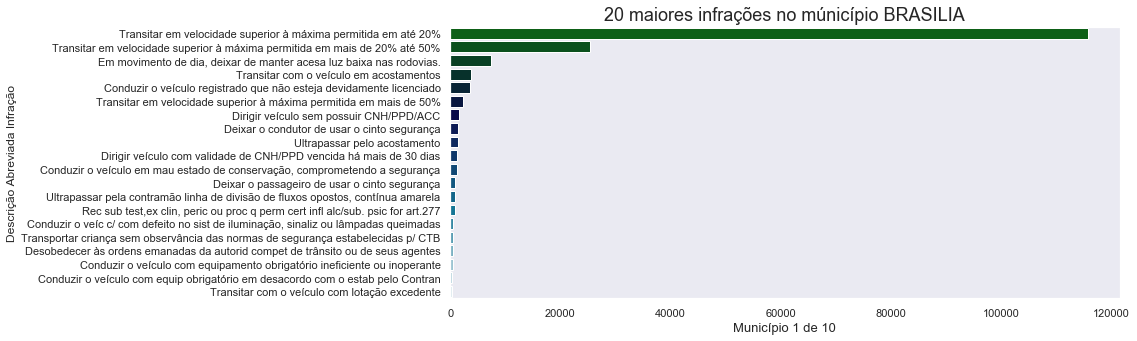

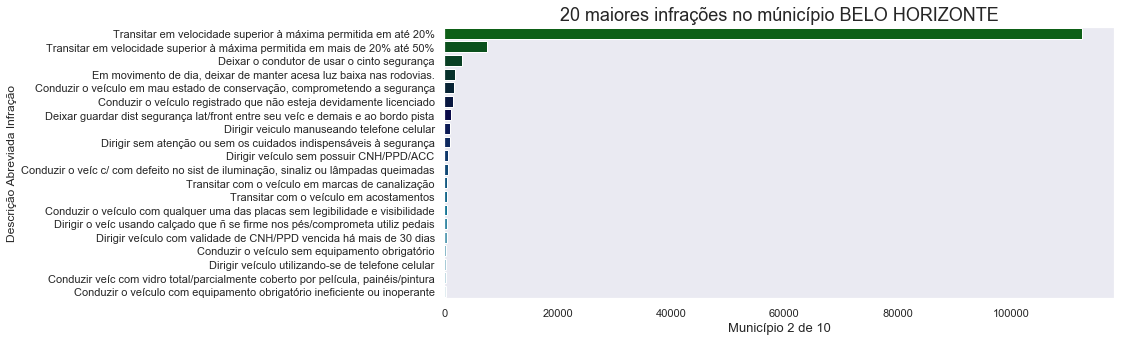

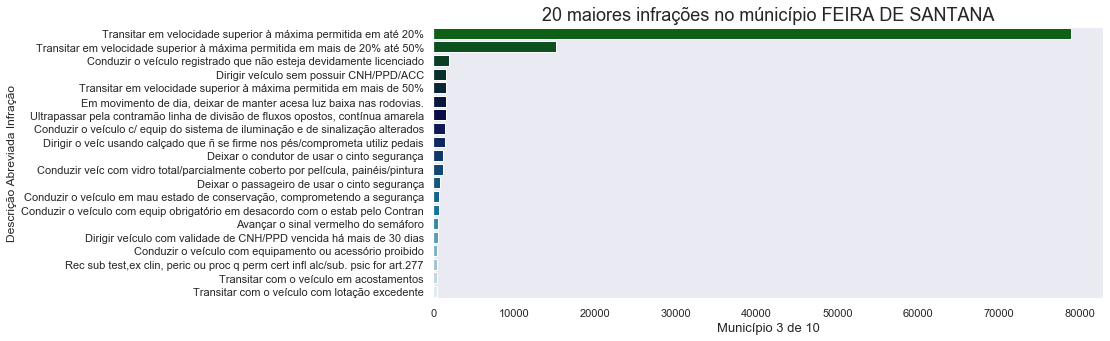

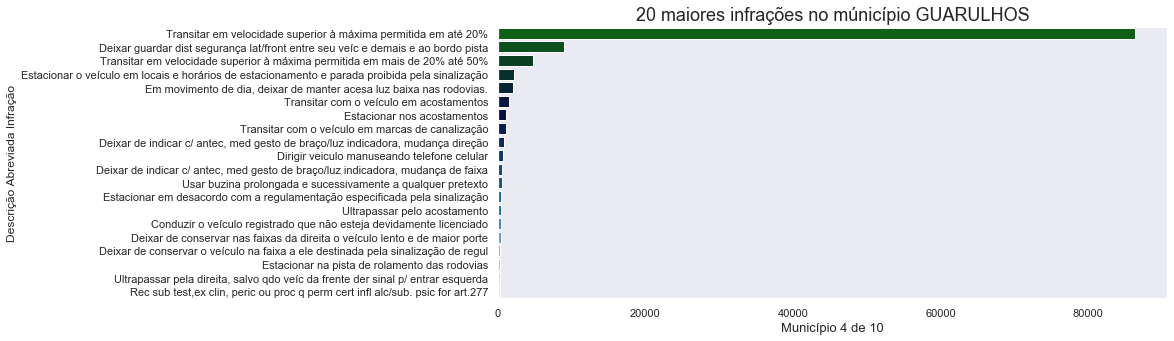

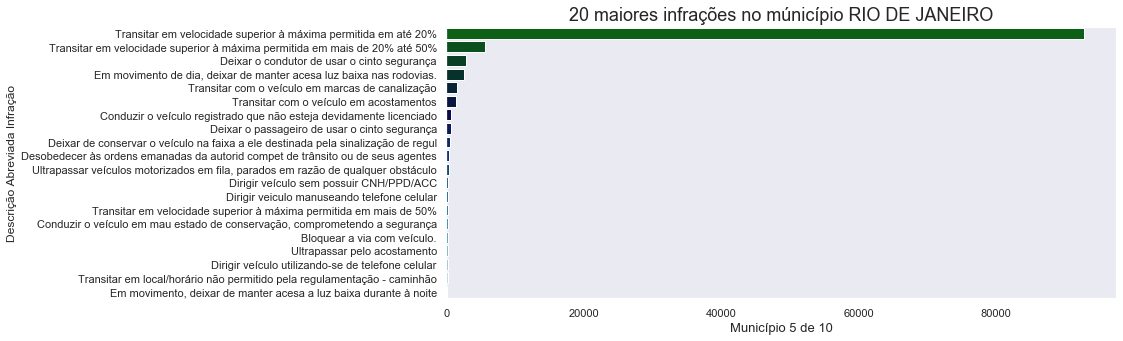

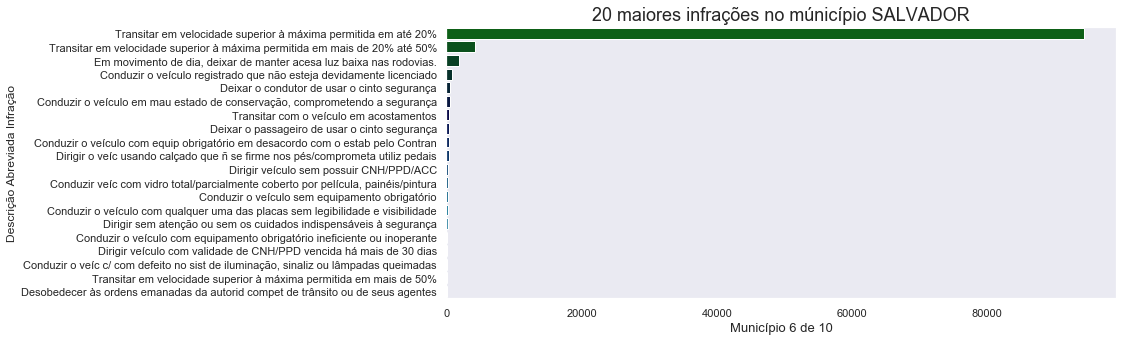

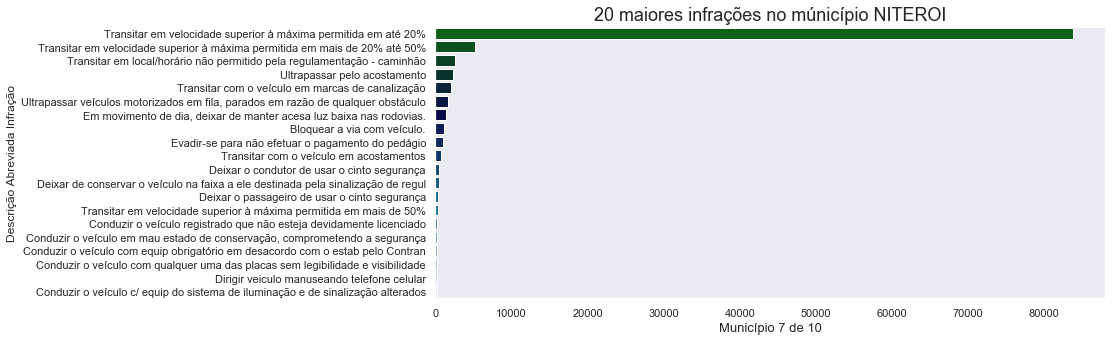

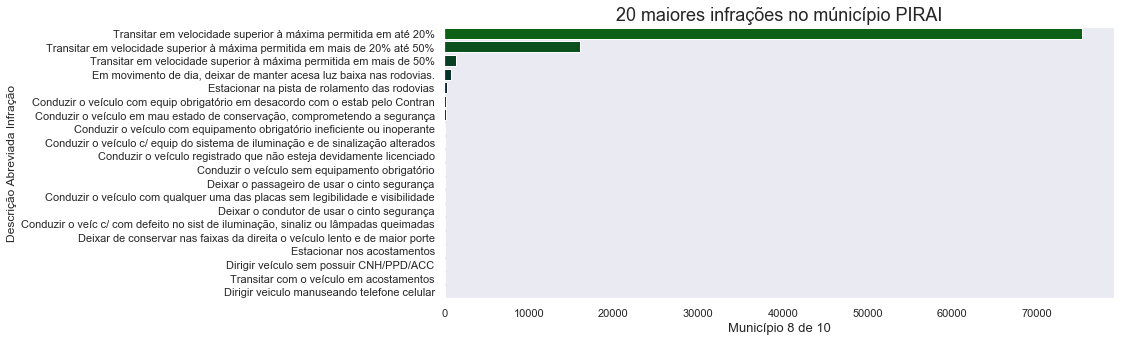

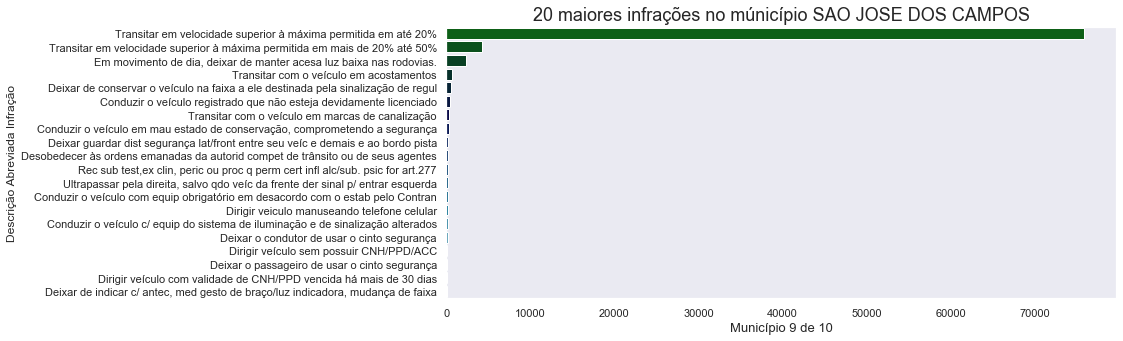

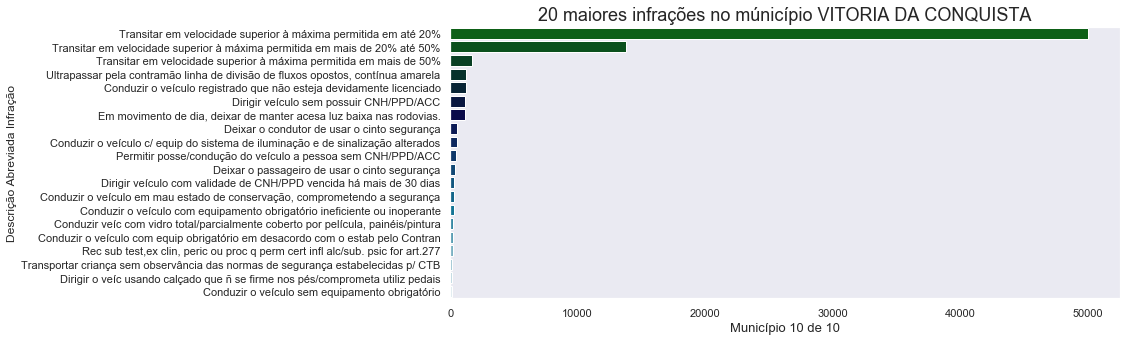

In [196]:
for j in range(len(municipios.index)):
    municipio_infra_desc = dados.loc[dados['Município'] == municipios.index[j]]
    municipio_infra_desc = municipio_infra_desc.groupby(['Descrição Abreviada Infração'])['Município'].count().sort_values(ascending=False)[:20]
    graficoBarra(x=municipio_infra_desc.values, y=municipio_infra_desc.index,
                title=f'20 maiores infrações no múnicípio {municipios.index[j]}',
                legX=f'Município {j+1} de {len(municipios.index)}')
    plt.show()

<hr><hr>

> #### Abaixo minha tentativa de obter a latitude e longitude via API

[Api google maps](https://github.com/googlemaps/google-maps-services-python) utilizada

Tive que instalar a biblioteca do googlemaps conforme a api

In [247]:
!pip install googlemaps

# fazendo o import da biblioteca
import googlemaps

# A key é a chave criada no Google Cloud Platform
gmaps = googlemaps.Client(key='chave do google')

Primeiro fiz a lista para pegar todos os dados e iterar sobre eles tentando pegar os valores da latitude e longitude, até cheguei a executar, mas percebi que estava pegando os valores duplicados e iria fazer várias requisições desnecessárias

In [203]:
latlong = [(br, km, municipio, uf) for br, km, municipio, uf in zip(dados['BR Infração'], dados['Km Infração'], dados['Município'], dados['UF Infração'])]

''' BR - 0 / KM - 1 / Municipio - 2 / UF - 3 '''
lista = []
for x in range(2):
    geocode_result = gmaps.geocode(address=f"BR-{latlong[x][0]}, km {latlong[x][1]} {latlong[x][2]} - {latlong[x][3]}")
    lista.append((geocode_result[0]['geometry']['location']['lat'], geocode_result[0]['geometry']['location']['lng']))

Agrupei os valores e mesmo reduzindo, e muito, as requisições que seriam feitas continuaria inviável. Com isso deixei de lado essa ideia para o momento do desafio.

In [250]:
agrupando = dados[['BR Infração', 'Km Infração', 'Município', 'UF Infração']].groupby(['BR Infração', 'Km Infração', 'Município', 'UF Infração']).count()
agrupando.explode

<bound method DataFrame.explode of Empty DataFrame
Columns: []
Index: [(10, 0, DOM ELISEU, PA), (10, 1, DOM ELISEU, PA), (10, 2, DOM ELISEU, PA), (10, 3, DOM ELISEU, PA), (10, 4, DOM ELISEU, PA), (10, 5, DOM ELISEU, PA), (10, 6, DOM ELISEU, PA), (10, 7, DOM ELISEU, PA), (10, 8, DOM ELISEU, PA), (10, 9, DOM ELISEU, PA), (10, 9, MARITUBA, PA), (10, 10, DOM ELISEU, PA), (10, 10, IPIXUNA DO PARA, PA), (10, 11, DOM ELISEU, PA), (10, 12, DOM ELISEU, PA), (10, 13, DOM ELISEU, PA), (10, 13, MARITUBA, PA), (10, 14, DOM ELISEU, PA), (10, 14, IPIXUNA DO PARA, PA), (10, 15, DOM ELISEU, PA), (10, 15, MARABA, PA), (10, 16, DOM ELISEU, PA), (10, 17, DOM ELISEU, PA), (10, 18, DOM ELISEU, PA), (10, 18, MAE DO RIO, PA), (10, 19, DOM ELISEU, PA), (10, 19, IPIXUNA DO PARA, PA), (10, 19, RONDON DO PARA, PA), (10, 19, ULIANOPOLIS, PA), (10, 20, DOM ELISEU, PA), (10, 21, DOM ELISEU, PA), (10, 22, DOM ELISEU, PA), (10, 22, SAO MIGUEL DO GUAMA, PA), (10, 23, DOM ELISEU, PA), (10, 24, DOM ELISEU, PA), (10, 24, 